# Introduction to Neural Networks

<div style="text-align: justify">
This is a first introduction to Neural Networks. It aims at presenting the main ideas, concept and element of vocabulary needed to understand this type of algorithm and to be able to implement them in a real world situation. 
<br></br>
In science, there are two main approches to simulate intelligent behaviour : 
<ul>
<li>Connectionism : using connected circuit that form neural networks </li>
<li>Symbolic AI : combining human readable representations of problems </li>
</ul>
Connectionism led to the development of modern neural networks, which are based on ideas that were developed as early as the 1940s. 
</div>

## 1. What is a neuron?

<div style="text-align: justify">
A neuron is a basic unit in a neural network composed of an input layer, an output layer, and one or more hidden layers. It is responsible for processing information and passing the results to other neurons in the network. Neurons are connected to each other by weighted connections, which can be adjusted to allow the neurons to learn. Neurons are the fundamental building blocks of a neural network, and they are responsible for making decisions, predictions, and learning from experiences.
</div>

### McCulloch and Pitts neuron - 1943

<center>
<img src="pictures/neuron.png">
</center>


### The perceptron - 1958
<div style="text-align: justify">
The perceptron algorithm was invented in 1958 by Frank Rosenblatt and is the foundation of modern neural networks. It is an algorithm for supervised learning of binary classifier that is composed of a single-layer feed-forward neural network that uses a step function as its activation function. It can be used for supervised learning, where the output is known and the algorithm is trained to predict the correct output for a given input. The perceptron is a linear classifier, meaning it assigns a binary label to each input vector. The perceptron algorithm is often used in supervised learning tasks such as image recognition and natural language processing.
</div>

<center>
<img src="pictures/perceptron.png">
</center>

### Finding the right parameters
<div style="text-align: justify">
For each of these neurons, a vector of containing the observations and the biais is passed as the input. For every element of the vector, there is a corresponding weight that will be passed in the activation function with the observation. In order to tune the neuron, we have to estimate the vector of weights by proceeding as follow : 
</div>

We have the data set $D_n$: 

$$
D_n = {(X_i,y_i)_{i \in [1,n]}} 
$$

With :
- The input data of size d : $ {X_i} \in R^n $
- The output : $ {y_i} \in \{-1,1\} $ 
- The vector of weights and biaises : $ \tilde{w} = (w_1, ... , w_n, b)$


How do we estimate $\tilde{w}$ ?

1. Start with : $\tilde{w} = 0$ 

2. If : $ \hspace{0.2cm} y_i <\tilde{w},\tilde{x_i}>  \hspace{0.2cm} \le 0 \hspace{0.2cm} \implies \hspace{0.2cm} y_i \ne pred(y_i) $ 
<br> Then : $ \tilde{w} \Leftarrow \tilde{w} + y_i \tilde{x_i}$
<br> Else &nbsp;: $ \tilde{w} \Leftarrow \tilde{w}$

The perceptron algorithm can be seen as a stochastic gradient descent : 

$$ 
\tilde{w}_{t+1} \leftarrow \tilde{w}_t - \eta \nabla_w \mathcal{L}(\tilde{w}_t) 
$$

With the corresponding loss function : 

$$ 
\mathcal{L}(\tilde{w}_t) = -\sum_{i \in [1,n]}y_i <\tilde{w},\tilde{x_i}> 
$$

The theorem of Block and Novikoff in 1963 showed that if the data set is linearly separable, then the number of update k of the perceptron is bounded by : $ k+1 \le \frac{1 + R^2}{\gamma^2} $, with $ \gamma = \min{y_i <\tilde{w^*},\tilde{x_i}>} $

<div style="text-align: justify">
As a consequence, the perceptron converge only if the data is linearly separable. Therefore, the hopes that the reserchers and the army had placed in the perceptron were shattered and thus began the first "AI winter", in the late 60s. 
</div>

### ADALINE and MADALINE - 1959
<div style="text-align: justify">
Those two algorithms aimed to solve real world problems, with non linearly separable data. They are based on similar neurons as the ones before with a loss function defined as the square diffference between a weighted sum of inputs and the output. The optimization procedure consists in a trivial gradient descent computed before the output function. 
</div>
<center>
<img src="Adaline.png">
</center>

## 2. Backpropagation : How to find the weights and biais? 

### What are we trying to do ?

In order to have a functional neural network, we aim to minimize the empirical risk : 

<center>

$ \underset{\theta}{\mathrm{argmin}}[\frac{1}{n}\sum_{i=1}^{n}\mathcal{l}(Y_i,f_\theta(X_i))] \equiv \underset{\theta}{\mathrm{argmin}}[\frac{1}{n}\sum_{i=1}^{n}\mathcal{l}_i(\theta)]$
</center>

We use a stochastic gradient with a rule:

- Considering $ I_t \subset \{1,n\}$, while $ \lvert \theta_t - \theta_{t+1} \lvert \ge \epsilon $:

<center>

$\theta_{t+1} = \theta_t - \eta_t [\frac{1}{\lvert I_t \lvert}\sum_{i\in I_t}^{n}\nabla_\theta\mathcal{l_i}(\theta_t)]$

</center> 

### What is backpropagation ?

<div style="text-align: justify"> 
The backpropagation helps us to optimize the parameters of our model. It requires a non-zero gradient almost everywhere, wich forbides us to choose a 0-1 loss function. 
The backpropagation help us to compute the gradient more efficiently, but is is not an optimization algorithm. It computes the loss of a gradient based on a batch of data. We do it by computing the gradient recursively. 
<div>

Let us consider a neural network with L layers, a vector output and a quadratic cost equal to :
<center>

$ C = \left\lVert \frac{1}{2}{y - a^{(l)}} \right\rVert^2 $

</center>


With $ z_j^{(l)} $ the entry of the neuron $j$ of the layer $l$, we have : 
<center>

$ \delta_j^{(l)} = \frac{\partial C}{\partial z_j^{(l)}} $

</center>

And the four fundamental equations of backpropagation are given by : 
<center>

$ \delta^{(L)} = \nabla_a C \otimes \sigma'(z^{(L)}) $ 

$ \delta^{(l)} = ((w^{(l+1)})^T\delta^{(l+1)})\otimes \sigma'(z^{(l)}) $

$\frac{\partial C}{\partial b_j^{(l)}} = \delta_j^{(l)}$

$\frac{\partial C}{\partial w_{j,k}^{(l)}} = a_k^{(l-1)} \delta_j^{(l)}$ 

</center>

<div style="text-align: justify"> 
We then proceed to train the neural network in 4 steps : 
<ol>
<li><strong>Feedfoward</strong> : We send the sample data through the network and store for each neuron the results of the activation function and the derivative.</li>
<li><strong>Output loss</strong>  : We compute the loss. </li>
<li><strong>Backpropagation</strong>  : We compute recursively the vectors of derivative from the last layer L to the first one, using the first two fundamental equations. Then we compute the gradient using the last two equations. </li>
<li><strong>Optimization</strong> : We update the weights and the biaises with a gradient-based optimisation procedure. </li>
</ol>
<div>

We repeat those steps until we reach the desired level of precision. 

<center>
<img src="pictures/backpropagation.webp">
</center>

## 3. Hyperparameters of a neural network

### What are the hyperparameters ?

When constructing a neural network, you have to make various choices concerning the structure of this network. For instance, you will have to choose the number of hidden layers, the number of neurons per layer, and the activation function within the neurons. There are no hard rules for these, but there are guidelines that will help you to make the right choice.

<center>
<img src="pictures/structureNN.png">
</center>

### Main activation functions 

There are a few common activation functions that are regularly used within the neurons. It is important to know how they work, when you should use them and when you should not.

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

##### 1. Sigmoid function 

This function is very common in data science. However, it has a few drawbacks : 
- The gradient is close to 0 at the asymptotes 
- It is not a zero-centered function, which means that you need to rescale the data
- Compute an exponential is costly 

$$
y = \frac{e^x}{1+e^x}
$$

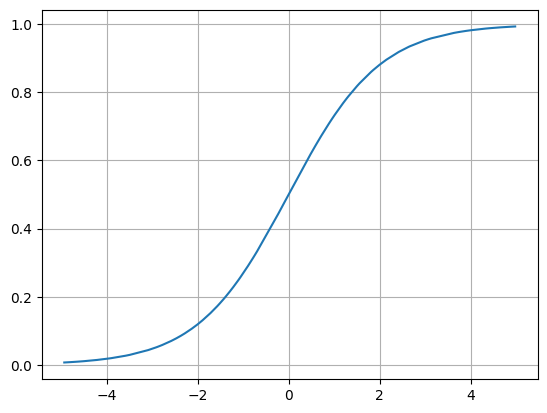

In [2]:
X = np.random.uniform(-5,5,100)
Y = np.exp(X)/(1+np.exp(X))
plt.grid()
plt.plot(np.sort(X),np.sort(Y))

##### 2. Hyperbolic tangent 

This function is similar to the sigmoid, but is centered.

$$
y = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}
$$

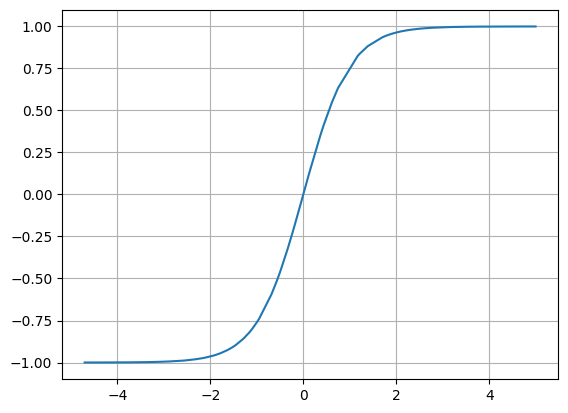

In [3]:
X = np.sort(np.random.uniform(-5,5,100))
Y = (np.exp(X)-np.exp(-X))/(np.exp(X)+np.exp(-X))
plt.grid()
plt.plot(X,Y)

##### 3. Rectified Linear Unit (ReLU)

This function is very efficient from a computational point of view, and the convergence is usually faster than for the previous two functions. However, it is saturated for $ x \le 0 $. 

$$
Y = \max(0,X)
$$

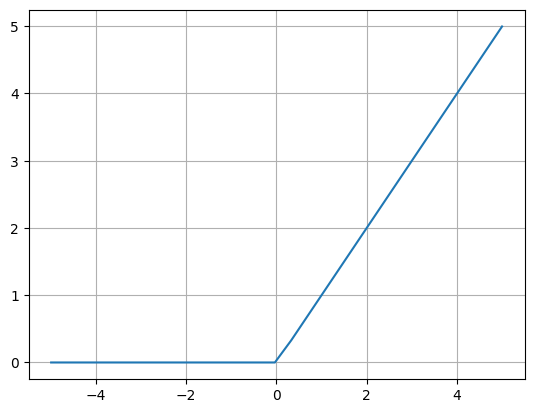

In [4]:
X = np.sort(np.random.uniform(-5,5,50))
Y = np.fmax(np.zeros(50),X)
plt.grid()
plt.plot(X,Y)

##### 4. Parametric ReLU
This function is a variation from the ReLU, that has non-zeros values for $ x < 0 $ :

$$
y = max\left(\alpha \cdot x, x \right) \\ \text{with : } \alpha <1
$$

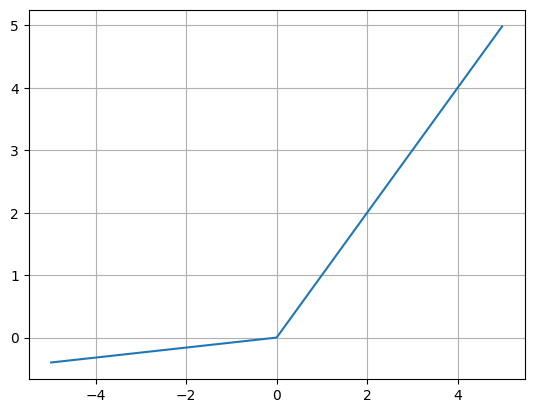

In [5]:
X = np.sort(np.random.uniform(-5,5,1000))
alpha = 0.08
Y = np.fmax(alpha*X,X)
plt.grid()
plt.plot(X,Y)

##### 5. Exponential Linear Unit (ELU)
This variation of the ReLU is differentiable in every point. It is also robust to noise. 

$$
y = \left\{ \begin{array}{ll}
x & \text{if } x \geq 0 \\ 
\alpha \left( \exp \left( x \right) - 1 \right) & \text{otherwise}
\end{array} \right. 
$$

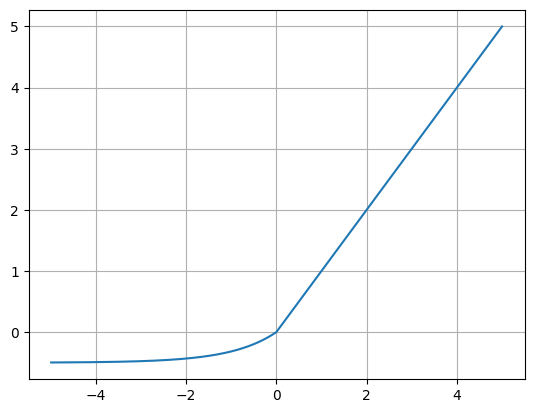

In [6]:
X = np.sort(np.random.uniform(-5,5,1000))
alpha = 0.5
Y = [x if x >= 0 else alpha*(np.exp(x)-1) for x in X]
plt.grid()
plt.plot(X,Y)

##### 6. Maxout

This function has no saturation. However, you need to tune k parameters. 

$$
y = max\left(\alpha \cdot x, \beta \cdot x,\delta \cdot x \right)
$$

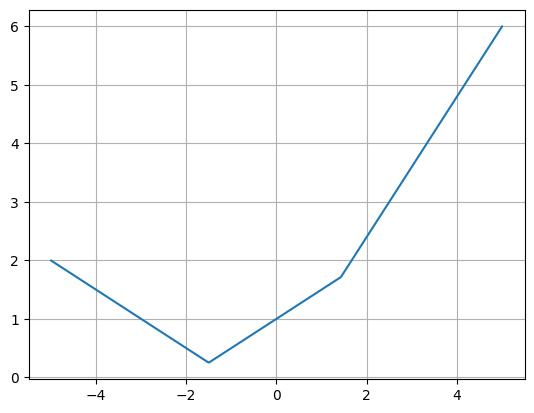

In [7]:
X = np.sort(np.random.uniform(-5,5,1000))
Y1 = 1.2*X
Y2 = -0.5*X-0.5
Y3 = 0.5*X+1
Y = np.maximum.reduce([Y1,Y2,Y3])
plt.grid()
plt.plot(X,Y)

##### 7. Swich function
This non monotonic function offers a trade off between the ReLU and the linear function. 

$$
y = x \cdot \frac{exp({\beta\cdot x})}{1 + exp({\beta\cdot x})}
$$



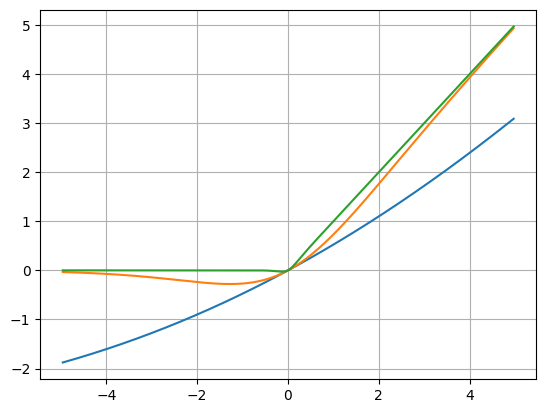

In [8]:
X = np.sort(np.random.uniform(-5,5,1000))
Y1 = X * (np.exp(0.1 * X)/(1+(np.exp(0.1 * X))))
Y2 = X * (np.exp(1 * X)/(1+(np.exp(1 * X))))
Y3 = X * (np.exp(10 * X)/(1+(np.exp(10 * X))))

plt.grid()
plt.plot(X,Y1)
plt.plot(X,Y2)
plt.plot(X,Y3)

A rule of thumb consists in using ReLU at first, then Swish, and to avoid sigmoid functions. 

### Output functions

### Loss Functions 

A loss function computes the "level of error" of a neural network. It is defined as such : 

$$
C(x) = \frac{1}{n} \sum_{i=1}^{n} \mathcal{l} (Y_i,f_\theta(X_i))
$$

There are 4 main loss functions :
- **Mean Square Error (MSE)** :

$$
C(x) = \frac{1}{n} \sum_{i=1}^{n} (Y_i - f_\theta(X_i))^2
$$

- **Mean Absolute Error** :

$$
C(x) = \frac{1}{n} \sum_{i=1}^{n} \vert Y_i - f_\theta(X_i) \vert
$$

- **0 - 1 error** :

$$
C(x) = \frac{1}{n} \sum_{i=1}^{n} \textit{1}_{Y_i \ne f_\theta(X_i)}
$$

- **Cross entropy**  :

$$ 
C(x) = -\frac{1}{n} \sum_{i=1}^{n} \left[y_{i} \log{\hat{y}_{i}}\right]
$$

With :
- $ {y_i} \in \{0,1\} $ the true output
- $ \hat{y}_{i} \in [0,1] $ the estimated output


<div style="text-align: justify">The cross entropyt is also called logarithmic loss, log loss or logistic loss. Each predicted class probability is compared to the actual class desired output 0 or 1 and a score/loss is calculated that penalizes the probability based on how far it is from the actual expected value. The penalty is logarithmic in nature yielding a large score for large differences close to 1 and small score for small differences tending to 0. <br>(see more : https://towardsdatascience.com/cross-entropy-loss-function-f38c4ec8643e)
<br><br><em>Exemple</em> : we consider a classification problem with 4 labels. After a few iterations we get a model precise enough to predict correctly the output. However the entropy is still important. After more iteration, the model gets more precise, and its entropy decreases.</div>
<center>
<img src="pictures/CE.png">
</center>
<center>
<img src="pictures/CE_opt.png">
</center>

## 4. Regularization

The objectif of regularization if to avoid over-fitting. There are several ways to do so : 

- Penalization 
- Soft weight sharing
- Dropout 
- Batch normalization
- Early stopping 

### Penalization 

Penalization consists in adding a function $ pen(\theta) $ that will increases as the weigths $ \theta $ increases. It is therefore an optimisation problem defined as follow : 

$$
\min_{\theta}(\mathcal{L}(\theta,X,y) + \lambda pen(\theta))
$$

There are three penalisation functions : 
- Lasso (or L1 norm):

$$
pen(\theta) = \lambda \vert\vert \theta \vert\vert_2^2
$$

- Ridge (or L2 norm):

$$
pen(\theta) = \lambda \vert\vert \theta \vert\vert_1
$$

- Elastic Net (combination of L1 and L2):

$$
pen(\theta) = \lambda \vert\vert \theta \vert\vert_2^2 + \lambda \vert\vert \theta \vert\vert_1
$$

*Remider* : the p-norm is defined as :  $ \left\|x\right\|_p = (\sum_{i=1}^{n}\vert x_i \vert^p)^{\frac{1}{p}} $

*Note* : the lasso regression induce sparsity, that is that the features that are not relevant are set to zero, what reduces the dimension of the weights vector

### Dropout

<div style="text:justify">
Dropout consists in removing temporarily some neurons from the network in order to train it and test the cooadaptation of each neuron. 
It can been seen as an averaging method. Some researchers suggest to drop only the weights of the neurons.
We will see later in this chapter how to implement it in a neural network.
</div>

### Batch normalization

Batch normalization aims at noramlizing the inputs in order the make the algorithm converge faster. In order to do so, we have to scale the inputs (mean, variance...). 

### Early stopping
<div style="text:justify">
The main idea behind early stopping is to stop the algorithm after k steps without improvement. We call the patience of 
the algorithm the number of times it will run without improvement before stopping.
</div>

## 5. In conclusion

<div style="text-align:justify">
A neural network is composed of a succession of layers, each of them corresponding to a set of neurons. Each neuron will recieve an input and return an output value computed with an activation function. Therefore, the quality of the predictions of the neural network will depend on the choice of the activation function, the number of layers and the depth of each layer. Thus it is necessary to chose those hyperparameters with great caution. Then begin the training phase and the weights and biaises of each neuron will be computed through a recursive process. The training of the neural network implies choosing a regularization function, that will affect the values of the weights. 
<br><br>
Now, we will see how to use thoses notions in order to create a functionning neural network. 
</div>